# Project#4 of AI Course of University of Tehran
Rasta Tadayon
810196436 
***

<h1 align="center"> Predicting Return of Customers to a Store Using Classification </h1>

<h2 align="center">Breif Description of the Project</h2> 

In this course project the objective is predicting if a cutomer will return to the store or not using a given dataset. The dataset consists of data about each costumer such as their customer Id, total quantity of merchandises they bought, the total price of their purchase, the country that they're from, the date in which the sale took place, the purchase count and wether or not the customer came back or not. The goal is predicting the **Is Back** feature with as high accuracy as possible, using the other features values. 

Scikit-learn is a free software machine learning library for the Python and it is used in this project for the classifications. Further more **K Nearest Neighbour**, **Decision Tree**, **Logistic Regression** classifiers are used as well as some **ensemble** classifiers such as **Bagging**, **Voting** and **Random Forest** which each will be explaned in the following sections.

The project was done in three phases which will be thoroughly explained in this report. 

<h2 align="center">Project Steps</h2> 

The project as stated before has 3 phases:
- **Phase 0**: In this phase the dataset is being normalized, meaning the dataset is prepared in a way that later on can be given to a classifier as an input. Since the dataset consists of a few **categorical** features, these features have to somehow be represented by numbers so that the sklearn classifiers will be able to understand them. Two of the ways this task can be done are represented in this article. The data is scaled because it can improve the performance of certain classifiers. Finally the data is divided into two sections: Train data and Test data, which the classifiers are trained using the train data and are tested using the test data.


- **Phase 1**: In this phase the classifiers are trained and their performances are measured using accuracy, precision and recall metrics. The classifiers as stated before consist of **K Nearest Neighbours**, **Decision Tree** and **Logistic Regression**. Each of these classifiers are explained later.


- **Phase 2**: In this phase **Ensemble Methods** are implemented. These methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. The ensemble methods used in this project consist of **Bagging**, **Hard Voting** and **Random Forest** which will be explained later in the article along with analysis on their performance.

<h2 align="center">Phase 0</h2> 

In [1]:
import numpy as np
import pandas as pd
import datetime
import collections
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
raw_data = pd.read_csv('data.csv')

The given dataset looks like this:

In [146]:
raw_data.head()

,Unnamed: 0,Customer ID,Total Quantity,Total Price,Country,Date,Is Back,Purchase Count,year,month,day,week day,is weekend
0,0,16995,-1,-1.25,United Kingdom,2010-12-02,No,1,2010,12,2,3,0
1,1,12552,85,13.52,Italy,2011-10-31,Yes,19,2011,10,31,0,0
2,2,13192,298,15.90,United Kingdom,2011-05-18,Yes,33,2011,5,18,2,0
3,3,16934,399,8.30,United Kingdom,2011-10-16,No,62,2011,10,16,6,1
4,4,14976,27,11.90,United Kingdom,2011-01-17,Yes,16,2011,1,17,0,0


<h3 align = "center"> Preprocess of the Data </h3>

After reading the dataset the preprocessing steps begin which consist of:
1. Extracting data from the **Date** feature
2. Feature Scaling
3. Encoding the categorical features (such as **Country**)
4. Calculating the Information Gains
5. Dividing the normalized dataset into test and train datasets

### Extracting data from **Date** feature

The date feature can be used to get some additional inforamtion from such as the year, month, and day of the month as well as day of the week and wether that day was a weekend or not. These extracted new features can help the classification because there are days or months in which sales happen more frequently and other assumptions like this. 

For extracting these new features Python library *date_time* is used which has predefined functions that make the task easier. In this project new added features were the year, month and day of the sale as well as the week day and wether or not that day was a weekend. This feature extraction however well it works, might not be the absolute best way of using the Date but it still does the job pretty well. 

In [147]:
data = raw_data
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['week day'] = data['Date'].dt.dayofweek
data['is weekend'] = np.where(data['Date'].dt.weekday_name.isin(['Sunday','Saturday']),1,0)

After the data is extracted from the **Date** feature the dataset looks like this:

In [148]:
data = data.drop(columns =['Date', 'Unnamed: 0'])
data.head()

,Customer ID,Total Quantity,Total Price,Country,Is Back,Purchase Count,year,month,day,week day,is weekend
0,16995,-1,-1.25,United Kingdom,No,1,2010,12,2,3,0
1,12552,85,13.52,Italy,Yes,19,2011,10,31,0,0
2,13192,298,15.90,United Kingdom,Yes,33,2011,5,18,2,0
3,16934,399,8.30,United Kingdom,No,62,2011,10,16,6,1
4,14976,27,11.90,United Kingdom,Yes,16,2011,1,17,0,0


***

### Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data.
#### Why scale?
In this dataset we have features which their values vary widely. In some machine learning algorithms,objective functions will not work properly without normalization. For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, this particular feature will have a significant influence on the distance value. So the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Also another reason is applied is that some machine learning algorithms converge way faster when normalized than when it's not normalized.



In this project the features that vary the most in value which were **Total Quantity**, **Total Price**, **Purchase Count** are normalized. The normalization method is this which is implemented using StandardScaling from sklearn.preprocessing library:

\begin{align}
x' = \frac{x-\bar{x}}{\sigma}
\end{align}

In [149]:
# total quantity va total price va purchase count ro scale mikonam
col_names = ['Total Quantity', 'Total Price', 'Purchase Count']
scaled_data = data.copy()
features = scaled_data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_data[col_names] = features

In [150]:
scaled_data.head()

,Customer ID,Total Quantity,Total Price,Country,Is Back,Purchase Count,year,month,day,week day,is weekend
0,16995,-0.524359,-0.044660,United Kingdom,No,-0.973192,2010,12,2,3,0
1,12552,-0.338777,-0.032135,Italy,Yes,-0.202732,2011,10,31,0,0
2,13192,0.120864,-0.030117,United Kingdom,Yes,0.396514,2011,5,18,2,0
3,16934,0.338815,-0.036562,United Kingdom,No,1.637809,2011,10,16,6,1
4,14976,-0.463937,-0.033509,United Kingdom,Yes,-0.331142,2011,1,17,0,0


### Encoding categorical features

Since computers can not understand categorical features they have to be encoded in a way that it is both suitable for our classifier and represents the data well. In this dataset the **Country** and **Is Back** features are the categorical features. Since the Is Back feature just includes 'Yes' and 'No' values these values can be transformed to 1 and 0 values with the code bellow. However the Country feature is a bit different.

#### Is Back Feature Labled

In [151]:
data['Is Back'] = data['Is Back'].apply(lambda x: 0 if x=='No' else 1)

In [152]:
data.head()

,Customer ID,Total Quantity,Total Price,Country,Is Back,Purchase Count,year,month,day,week day,is weekend
0,16995,-1,-1.25,United Kingdom,0,1,2010,12,2,3,0
1,12552,85,13.52,Italy,1,19,2011,10,31,0,0
2,13192,298,15.90,United Kingdom,1,33,2011,5,18,2,0
3,16934,399,8.30,United Kingdom,0,62,2011,10,16,6,1
4,14976,27,11.90,United Kingdom,1,16,2011,1,17,0,0


***

As mentioned before in this article two encoding methods are discussed:
1. Label Encoding
2. One-hot Encoding

#### Label Encoding
Label encoding is simply converting each value of the feature to a number. For label encoding in this project the LabelEncoder from sklearn.preprocessing library is used which assigns a value for each country.


The problem that might happen in Label encoding is since there are different numbers in the same column, the classifier might misunderstand the data to be in some kind of order for example 0 < 1 < 2, but this does not mean the corresponding countries have an ordered relation with each other. This can result in bad predictions in linear models such as linear regression.

The following is the label encoding for both the scaled and non scaled datasets:

In [153]:
le = LabelEncoder()
le.fit(data['Country'])
data_labeled = data.copy()
data_labeled['Country'] = le.transform(data['Country'])

In [154]:
le = LabelEncoder()
le.fit(scaled_data['Country'])
data_labeled_scaled = scaled_data.copy()
data_labeled_scaled['Country'] = le.transform(scaled_data['Country'])

After labeling is done the *Country* feature is scaled as well.

In [199]:
col_names = ['Country']
data_labeled_scaled = data_labeled_scaled.copy()
features = data_labeled_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data_labeled_scaled[col_names] = features

#### One-hot Encoding

In this coding tecnique the categorical feature is broken down to n new features which n is the number of different values of this feature. Each row will have just 1 value among all of these new columns which represent the country of that data member.

One-hot encoding does not have the disadvantage of being ordinal however when the feature has many different values the dataset becomes very big very quick and it may become prone to overfitting.

The pandas *get_dummies* function was used for one-hot encoding which is in the following:

In [200]:
data_one_hot_scaled = pd.concat([scaled_data,pd.get_dummies(scaled_data['Country'], prefix='country')],axis=1).drop(['Country'],axis=1)
data_one_hot = pd.concat([data,pd.get_dummies(data['Country'], prefix='country')],axis=1).drop(['Country'],axis=1)

***

### Calculating information gain

Mutual information is a quantity that measures how much one random variables tells about another. Mutual information can be thought of as the reduction in uncertainty about one random variable given knowledge of another. High mutual information indicates a large reduction in uncertainty; low mutual information indicates a small reduction; and zero mutual information between two random variables means the variables are independent.

For calculating the information gain of features in this project the *mutual_info_classif* function from sklearn.feature_selection was used. The function returns an estimate for mutual information for a discrete target variable. To get a better informatio gain value hte 'Customer ID' column was discarded beacuse it is unique to each customer and cannot give valuable information about if another costumer will be back to the store or not.

Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

The code for calculating the information gain is as follows.

In [201]:
information_gains_labeled = dict(zip(data_labeled_scaled.drop(columns=['Is Back','Customer ID']).columns,
               mutual_info_classif(data_labeled_scaled.drop(columns=['Is Back','Customer ID']),
                                   data_labeled_scaled['Is Back'])
               ))
information_gains_one_hot = dict(zip(data_one_hot_scaled.drop(columns=['Is Back','Customer ID']).columns,
               mutual_info_classif(data_one_hot_scaled.drop(columns=['Is Back','Customer ID']),
                                   data_one_hot_scaled['Is Back'])
               ))

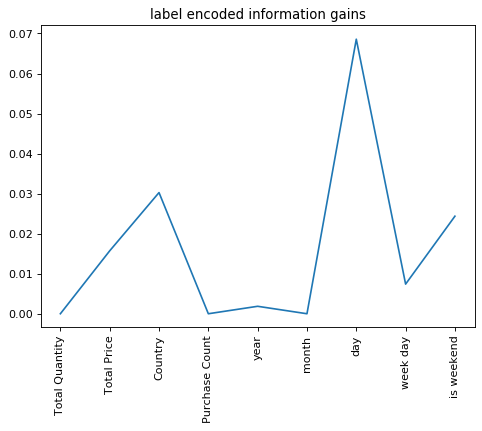

In [202]:
lists_labeled = sorted(information_gains_labeled.items())
x_labeled, y_labeled = zip(*lists_labeled)

fig=plt.figure(figsize=(7,5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x_labeled, y_labeled)
plt.xticks(x_labeled, information_gains_labeled.keys(), rotation='vertical')
plt.title('label encoded information gains')
plt.show()

As can be observed from the plot 'day', 'is weekend' and 'country' have the biggest information gain values for the labeled model which mean these features are the most closely correlated with the 'Is Back' feature.


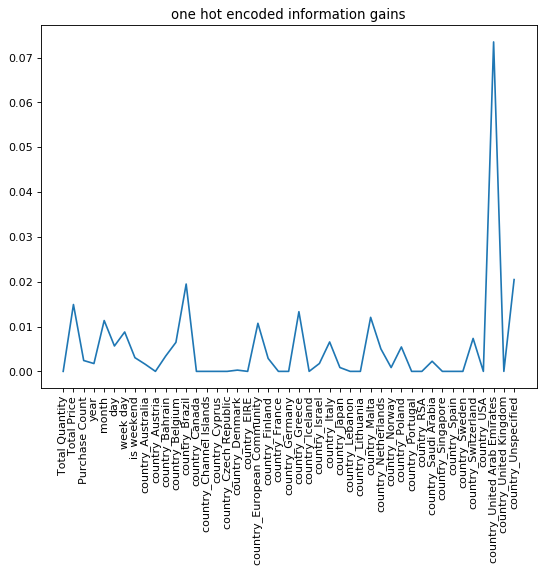

In [203]:
lists_one_hot = sorted(information_gains_one_hot.items())
x_one_hot, y_one_hot = zip(*lists_one_hot)

fig=plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x_one_hot, y_one_hot)
plt.xticks(x_one_hot, information_gains_one_hot.keys(), rotation='vertical')
plt.title('one hot encoded information gains')
plt.show()

The mutual information of the one-hot encoded dataset is given above. United Arab Emirates has the highest MI value and some countries have as low as 0 for their MI value. 

***

### Dividing the normalized dataset into test and train datasets

After the normalization phase is done the dataset is ready and the classifiers can use it.
For the division *divide* fucntions from sklearn.model_selection is used which returns 4 dataset likes. Two are for the training data and two are for test data. And the dependent variable which here is the 'Is Back' feature.

In [204]:
def divide(dataset):
    independent = list(dataset.columns)
    independent.remove('Is Back')
    x_train, x_test, y_train, y_test = train_test_split(dataset[independent], dataset['Is Back'], test_size = 0.2, random_state = 23)
    return x_train, x_test, y_train, y_test

In [205]:
x_train_labeled, x_test_labeled, y_train_labeled, y_test_labeled = divide(data_labeled)
x_train_labeled_scaled, x_test_labeled_scaled, y_train_labeled_scaled, y_test_labeled_scaled = divide(data_labeled_scaled)
x_train_one_hot, x_test_one_hot, y_train_one_hot, y_test_one_hot = divide(data_one_hot)
x_train_one_hot_scaled, x_test_one_hot_scaled, y_train_one_hot_scaled, y_test_one_hot_scaled = divide(data_one_hot_scaled)

***

<h2 align="center">Phase 1</h2> 

In this phase we try to classify the data using the following classifiers.

### K Nearest Neighbours Classifier
***

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure for example distance functions. Since the KNN classifier calculates distance scaling the data can have a great impact on how well the classifier performs. In this project for implementing this algorithm *KNeighborsClassifier* from sklearn.neighbors was used.

The following is the metrics for both scaled and non-scaled, label and one-hot encoded data:

#### Label Encoded and NOT scaled

In [206]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train_labeled.drop(columns=['Customer ID']), y_train_labeled)

KNeighborsClassifier(n_neighbors=9)

In [207]:
knn_predition_test = neigh.predict(x_test_labeled.drop(columns=['Customer ID']))
knn_prediction_train = neigh.predict(x_train_labeled.drop(columns=['Customer ID']))

In [208]:
print("train :\n",metrics.classification_report(y_train_labeled, knn_prediction_train))
print('------------------------------------------')
print("test :\n",metrics.classification_report(y_test_labeled, knn_predition_test))

train :
               precision    recall  f1-score   support

           0       0.65      0.27      0.38      1097
           1       0.74      0.93      0.82      2395

    accuracy                           0.72      3492
   macro avg       0.69      0.60      0.60      3492
weighted avg       0.71      0.72      0.68      3492

------------------------------------------
test :
               precision    recall  f1-score   support

           0       0.39      0.15      0.22       283
           1       0.69      0.88      0.77       591

    accuracy                           0.65       874
   macro avg       0.54      0.52      0.50       874
weighted avg       0.59      0.65      0.59       874



The metrics are given above: 
Accuracy = 65%
Precision = 59%
Recall = 65%

These metrics obviously indicate that the classifier is not doing a good job at classifying. Next we will see the impact of scaling the data:

#### Label encoded and scaled

In [223]:
col_names = ['Country']
scaled_country_train = x_train_labeled_scaled.copy()
features = scaled_country_train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_country_train[col_names] = features

col_names = ['Country']
scaled_country_test = x_test_labeled_scaled.copy()
features = scaled_country_test[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_country_test[col_names] = features


In [224]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train_labeled_scaled.drop(columns=['Customer ID']), y_train_labeled_scaled)

KNeighborsClassifier(n_neighbors=9)

In [225]:
knn_predition_test = neigh.predict(x_test_labeled_scaled.drop(columns=['Customer ID']))
knn_prediction_train = neigh.predict(x_train_labeled_scaled.drop(columns=['Customer ID']))

print("train :\n",metrics.classification_report(y_train_labeled_scaled, knn_prediction_train))
print('------------------------------------------')
print("test :\n",metrics.classification_report(y_test_labeled_scaled, knn_predition_test))


train :
               precision    recall  f1-score   support

          No       0.67      0.41      0.51      1097
         Yes       0.77      0.91      0.83      2395

    accuracy                           0.75      3492
   macro avg       0.72      0.66      0.67      3492
weighted avg       0.74      0.75      0.73      3492

------------------------------------------
test :
               precision    recall  f1-score   support

          No       0.62      0.39      0.47       283
         Yes       0.75      0.88      0.81       591

    accuracy                           0.72       874
   macro avg       0.68      0.64      0.64       874
weighted avg       0.71      0.72      0.70       874



It is observable that the preformance metrics have gone higher significantly due to scaling the data.
Accuracy = 72%
Precision =71%
Recall = 72%

As stated before since the KNN uses distance to estimate the class of the next data member, scaling the features means that they will not be subjected to bias from the feature with a broader range. 

In this case I scaled the country feature to test for better performance however it did not 

#### One-hot encoded NOT scaled

In [212]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train_one_hot.drop(columns=['Customer ID']), y_train_one_hot)
knn_predition_test = neigh.predict(x_test_one_hot.drop(columns=['Customer ID']))
knn_prediction_train = neigh.predict(x_train_one_hot.drop(columns=['Customer ID']))
print("train :\n",metrics.classification_report(y_train_one_hot, knn_prediction_train))
print('------------------------------------------')
print("test :\n",metrics.classification_report(y_test_one_hot, knn_predition_test))


train :
               precision    recall  f1-score   support

           0       0.65      0.28      0.39      1097
           1       0.74      0.93      0.82      2395

    accuracy                           0.73      3492
   macro avg       0.69      0.61      0.61      3492
weighted avg       0.71      0.73      0.69      3492

------------------------------------------
test :
               precision    recall  f1-score   support

           0       0.36      0.14      0.21       283
           1       0.68      0.87      0.77       591

    accuracy                           0.64       874
   macro avg       0.52      0.51      0.49       874
weighted avg       0.58      0.64      0.58       874



The one-hot encoded but not scaled KNN has these performance metrics: 
Accuracy = 64%
Precision = 58%
Recall = 64%

As it is observable the non-scaled one-hot encoded KNN works way worse than label encoded and scaled KNN because scaling makes a significant difference in KNN. In comparison with non-scaled label encoded KNN however they both have almost similar performance metrics but the label encoded works slightly better.

#### One-hot encoded scaled

In [213]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train_one_hot_scaled.drop(columns=['Customer ID']), y_train_one_hot_scaled)

KNeighborsClassifier(n_neighbors=9)

In [214]:
knn_predition_test = neigh.predict(x_test_one_hot_scaled.drop(columns=['Customer ID']))
knn_prediction_train = neigh.predict(x_train_one_hot_scaled.drop(columns=['Customer ID']))
print("train :\n",metrics.classification_report(y_train_one_hot_scaled, knn_prediction_train))
print('------------------------------------------')
print("test :\n",metrics.classification_report(y_test_one_hot_scaled, knn_predition_test))


train :
               precision    recall  f1-score   support

          No       0.67      0.42      0.52      1097
         Yes       0.77      0.91      0.84      2395

    accuracy                           0.75      3492
   macro avg       0.72      0.67      0.68      3492
weighted avg       0.74      0.75      0.74      3492

------------------------------------------
test :
               precision    recall  f1-score   support

          No       0.61      0.39      0.48       283
         Yes       0.75      0.88      0.81       591

    accuracy                           0.72       874
   macro avg       0.68      0.64      0.64       874
weighted avg       0.71      0.72      0.70       874



The scaled one-hot endcoded KNN works better than non scaled ones but is similar to scaled label encoded. Performance metrics: 

Accuracy = 72%
Precision = 71%
Recall = 72%



Text(0, 0.5, 'score')

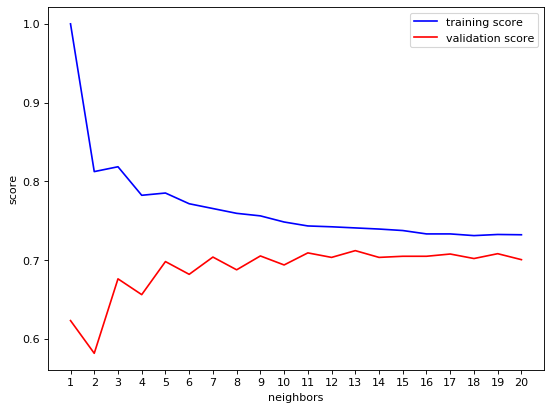

In [195]:
degree = np.arange(1, 21)
train_score, val_score = validation_curve(KNeighborsClassifier(), x_train_one_hot_scaled.drop(columns=['Customer ID'])
                                          , y_train_one_hot_scaled, param_name = 'n_neighbors', param_range = degree)
fig=plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xticks(np.arange(1,21))
plt.xlabel('neighbors')
plt.ylabel('score')

The above plot shows the Accuracy metrics for different number of neighbors on the one-hot encoded and scaled dataset. As it is observable as the number of neighbours gets larger the test dataset accuracy get better and then it becomes stable. As for the training data set as the number of neighbours gets bigger the accuracy value decreases.

The accuracy value is very good for the training set when the number of neighbours are a or 2 and at those times the value for test dataset are very poor so it's safe to say the KNN classifier overfits in the small value of neighbours.

For the classifier *n_neighbour* hyperparametr value of 9 was selected as it is a peak in the above diagram.

### Decision Tree Classifier
***


Decision tree learning is a predictive model used in machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). You can read more about decision trees in this [link](https://en.wikipedia.org/wiki/Decision_tree_learning).

Scalling in general improves models based on distance and has a slight effect or none at all on other models. In the decision tree model distance of different data models are not used for the prediction however the scaled data does not effect the prediction in a bad way so scaled data is used for this part as well.

For implementation of the desicion tree the *DecisionTreeClassifier* from the sklearn.tree was used. I have set the criterion parameter to be set to entropy to split the data on the branch nodes based on entropy as it worked better than the alternative which was Gini impurity.

#### Label encoded and scaled

In [215]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtc.fit(scaled_country_train.drop(columns=['Customer ID']), y_train_labeled_scaled)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [216]:
dtc_prediction_test = dtc.predict(scaled_country_test.drop(columns=['Customer ID']))
dtc_prediction_train = dtc.predict(scaled_country_train.drop(columns=['Customer ID']))

In [217]:
print("test :\n",metrics.classification_report(y_test_labeled_scaled, dtc_prediction_test))
print('------------------------------------------')
print("train :\n",metrics.classification_report(y_train_labeled_scaled, dtc_prediction_train))

test :
               precision    recall  f1-score   support

          No       0.73      0.39      0.50       283
         Yes       0.76      0.93      0.84       591

    accuracy                           0.76       874
   macro avg       0.75      0.66      0.67       874
weighted avg       0.75      0.76      0.73       874

------------------------------------------
train :
               precision    recall  f1-score   support

          No       0.68      0.36      0.47      1097
         Yes       0.76      0.92      0.83      2395

    accuracy                           0.74      3492
   macro avg       0.72      0.64      0.65      3492
weighted avg       0.73      0.74      0.72      3492



The performance metrics for decision tree with scaled label encoded data are like the following:
Accuracy = 74%
Precision = 73%
Recall = 74%

These metrics show that the decision tree classifier can work sligtly (around 3 percent) better than the KNN classifier. This might be because all of one classes members do not fall around the same values in the features but since the decision tree does not mind the distance in between the data members it can work better.(however this is just an assumption)

Text(0, 0.5, 'score')

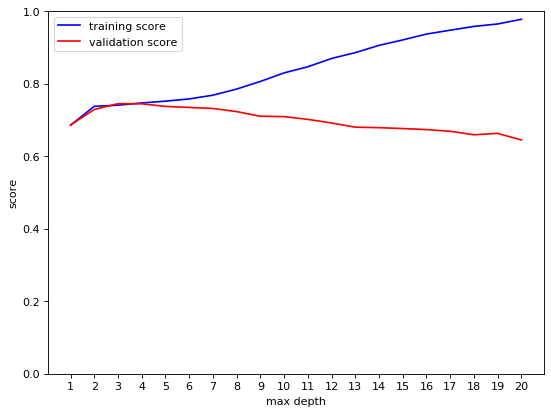

In [219]:
degree = np.arange(1, 21)
train_score, val_score = validation_curve(DecisionTreeClassifier(criterion='entropy'), x_train_labeled_scaled
                                          ,y_train_labeled_scaled, param_name = 'max_depth', param_range = degree)

fig=plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xticks(degree)
plt.xlabel('max depth')
plt.ylabel('score')

The diagram above shows the accuracy score for different max_length for the tree. As is observable as the depth of the tree increases the training data can be predicted with a higher accuracy however the accuracy on the test data begins to decrease therefore it is safe to say that after the depth of 5 the tree becomes overfit for the training data and can not predict the test data correctly.

#### One-hot encoded and scaled

In [220]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtc.fit(x_train_one_hot_scaled.drop(columns=['Customer ID']), y_train_one_hot_scaled)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [221]:
dtc_prediction_test = dtc.predict(x_test_one_hot_scaled.drop(columns=['Customer ID']))
dtc_prediction_train = dtc.predict(x_train_one_hot_scaled.drop(columns=['Customer ID']))

print("train :\n",metrics.classification_report(y_train_one_hot_scaled, dtc_prediction_train))
print('------------------------------------------')
print("test :\n",metrics.classification_report(y_test_one_hot_scaled, dtc_prediction_test))


train :
               precision    recall  f1-score   support

          No       0.70      0.36      0.47      1097
         Yes       0.76      0.93      0.84      2395

    accuracy                           0.75      3492
   macro avg       0.73      0.64      0.66      3492
weighted avg       0.74      0.75      0.72      3492

------------------------------------------
test :
               precision    recall  f1-score   support

          No       0.74      0.37      0.49       283
         Yes       0.76      0.94      0.84       591

    accuracy                           0.75       874
   macro avg       0.75      0.65      0.66       874
weighted avg       0.75      0.75      0.73       874



The decision tree works better with one-hot encoded data as its performance metrics are around 2 percents higher:

Accuracy = 75%
Precision = 75%
Recall = 75%

Text(0, 0.5, 'score')

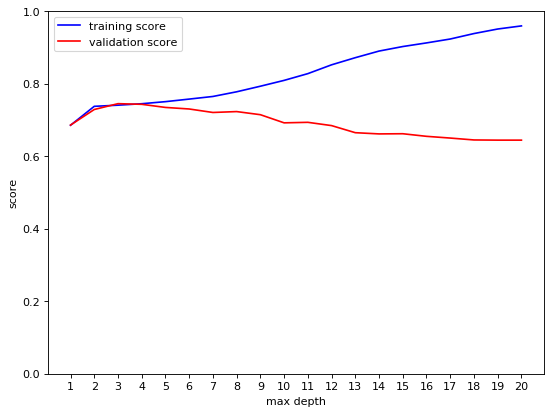

In [222]:
degree = np.arange(1, 21)
train_score, val_score = validation_curve(DecisionTreeClassifier(criterion='entropy')
                                          , x_train_one_hot_scaled.drop(columns=['Customer ID','Purchase Count'])
                                          , y_train_one_hot_scaled, param_name = 'max_depth', param_range = degree)

fig=plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xticks(degree)
plt.xlabel('max depth')
plt.ylabel('score')

The diagram above shows the accuracy value for different max_depth hyperparameters for the one-hot encoded data. This diagram is the same as the previous one as they both start to over-fit after the depth of 5. The details specified for the previous diagram applies to this one as well.

### Logistic regression classifier
***

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. To see how this classifier works exactly view this [link](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148).

For implementation of logistic regression classifier the *LogisticRegression* from the sklearn.linear_model was used. Both of the label-encoded and one-hot encoded datas are given to this classifier for the sake of comparison. 

#### Label encoded and scaled

In [226]:
lrc = LogisticRegression()
lrc.fit(scaled_country_train.drop(columns=['Customer ID']), y_train_labeled_scaled)

LogisticRegression()

In [227]:
lrc_prediction_test = lrc.predict(scaled_country_test.drop(columns=['Customer ID']))
lrc_prediction_train = lrc.predict(scaled_country_train.drop(columns=['Customer ID']))

print("train :\n",metrics.classification_report(y_train_labeled_scaled, lrc_prediction_train))
print('------------------------------------------')
print("test :\n",metrics.classification_report(y_test_labeled_scaled, lrc_prediction_test))


train :
               precision    recall  f1-score   support

          No       0.85      0.02      0.03      1097
         Yes       0.69      1.00      0.82      2395

    accuracy                           0.69      3492
   macro avg       0.77      0.51      0.42      3492
weighted avg       0.74      0.69      0.57      3492

------------------------------------------
test :
               precision    recall  f1-score   support

          No       0.67      0.01      0.01       283
         Yes       0.68      1.00      0.81       591

    accuracy                           0.68       874
   macro avg       0.67      0.50      0.41       874
weighted avg       0.67      0.68      0.55       874



In [228]:
lrc = LogisticRegression(max_iter=500, random_state=0)
lrc.fit(x_train_one_hot_scaled.drop(columns=['Customer ID']), y_train_one_hot_scaled)

LogisticRegression(max_iter=500, random_state=0)

In [229]:
lrc_prediction_test = lrc.predict(x_test_one_hot_scaled.drop(columns=['Customer ID']))
lrc_prediction_train = lrc.predict(x_train_one_hot_scaled.drop(columns=['Customer ID']))

print("train :\n",metrics.classification_report(y_train_one_hot_scaled, lrc_prediction_train))
print('------------------------------------------')
print("test :\n",metrics.classification_report(y_test_one_hot_scaled, lrc_prediction_test))


train :
               precision    recall  f1-score   support

          No       0.81      0.02      0.03      1097
         Yes       0.69      1.00      0.82      2395

    accuracy                           0.69      3492
   macro avg       0.75      0.51      0.42      3492
weighted avg       0.73      0.69      0.57      3492

------------------------------------------
test :
               precision    recall  f1-score   support

          No       0.67      0.01      0.01       283
         Yes       0.68      1.00      0.81       591

    accuracy                           0.68       874
   macro avg       0.67      0.50      0.41       874
weighted avg       0.67      0.68      0.55       874



Logistic regression does not work as well as the other two classifiers as its metrics for both of the datasets are as follows:

Accuracy = 68%
Precision = 67%
Recall = 68%

<h2 align="center">Phase 2</h2> 

***

In this phase we try to enhance the abbility of our single classifiers using ensemble methods. The ensemble methods used are:
1. Bagging
2. Random Forest
3. Hard Voting 

### Bagging

According to sklearn documentation Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree or KNN), by introducing randomization into its construction procedure and then making an ensemble out of it. If samples are drawn with replacement, then the method is known as Bagging.

For implementation of the bagging classifier *BaggingClassifier* from sklearn.ensemble was used. Also both KNN classifier and decision tree were used as the base classifier and the max_features and max_samples parameters were set to 0.5.
max_feature indicates the number or percentage of the features that will be provided to each classifier and max_samples indicates the number or percentage of the samples that will be provided to the classifiers.

Since in phase 1 the number of 9 neighbors were proven to work best with our data this hyper parameter was passed to the classifiers. The implementation of bagging classifier is as follows:



In [230]:
bagging_classifier_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=9),
                         max_features = 0.5, max_samples = 0.5, n_estimators=100, random_state=0
                                      ).fit(x_train_one_hot_scaled.drop(columns=['Customer ID'])
                                                              , y_train_one_hot_scaled)
bagging_knn_train = bagging_classifier_knn.predict(x_train_one_hot_scaled.drop(columns=['Customer ID']))
bagging_knn_test = bagging_classifier_knn.predict(x_test_one_hot_scaled.drop(columns=['Customer ID']))

In [231]:
print("bagging knn train:\n", metrics.classification_report(y_train_one_hot_scaled, bagging_knn_train))
print("---------------------------------------------------------")
print("bagging knn test:\n", metrics.classification_report(y_test_one_hot_scaled, bagging_knn_test))

bagging knn train:
               precision    recall  f1-score   support

          No       0.85      0.20      0.33      1097
         Yes       0.73      0.98      0.84      2395

    accuracy                           0.74      3492
   macro avg       0.79      0.59      0.58      3492
weighted avg       0.77      0.74      0.68      3492

---------------------------------------------------------
bagging knn test:
               precision    recall  f1-score   support

          No       0.81      0.19      0.31       283
         Yes       0.72      0.98      0.83       591

    accuracy                           0.72       874
   macro avg       0.76      0.58      0.57       874
weighted avg       0.75      0.72      0.66       874



The performance metrics of bagging method using the KNN classifier has improved around 3 percents. 

In [232]:
bagging_classifier_dtc = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth= 5),
                         max_features = 0.5, max_samples = 0.5, n_estimators=250
                                      ).fit(x_train_one_hot_scaled.drop(columns=['Customer ID'])
                                                              , y_train_one_hot_scaled)
bagging_dtc_train = bagging_classifier_dtc.predict(x_train_one_hot_scaled.drop(columns=['Customer ID']))
bagging_dtc_test = bagging_classifier_dtc.predict(x_test_one_hot_scaled.drop(columns=['Customer ID']))
print("bagging decision tree train:\n",metrics.classification_report(y_train_one_hot_scaled, bagging_dtc_train))
print('------------------------------------------')
print("bagging decision tree test:\n",metrics.classification_report(y_test_one_hot_scaled, bagging_dtc_test))

bagging decision tree train:
               precision    recall  f1-score   support

          No       0.83      0.19      0.31      1097
         Yes       0.73      0.98      0.83      2395

    accuracy                           0.73      3492
   macro avg       0.78      0.59      0.57      3492
weighted avg       0.76      0.73      0.67      3492

------------------------------------------
bagging decision tree test:
               precision    recall  f1-score   support

          No       0.87      0.19      0.31       283
         Yes       0.72      0.99      0.83       591

    accuracy                           0.73       874
   macro avg       0.79      0.59      0.57       874
weighted avg       0.77      0.73      0.66       874



The performance metrics of bagging with the decision tree as the base classifier has improved one metric about 2 percents and worsen two other metrics around 2 percents. 

In general the reason bagging might help improve the performance metrics is because bagging equalizes influence of the classifiers. This means that the influence of the points which have a large impact on the overall model decreases compared to non-bagged models. This is good if those points are bad for the model's performance, which is not always the case.

***

### Random Forest Classifier

According to sklearn documentation random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. In this project for implementing the forest the *RandomForestClassifier* from sklearn.ensemble is used. This classifier accepts many parameters. The effect of some on the accuracy of the model is tested and shown bellow.

In [248]:
rfc = RandomForestClassifier(random_state=0, criterion="entropy", max_depth=9,
                             max_features = 0.5, max_samples = 0.5, n_estimators=250)
rfc.fit(x_train_one_hot_scaled, y_train_one_hot_scaled)
rfc_prediction_train = rfc.predict(x_train_one_hot_scaled)
rfc_prediction_test = rfc.predict(x_test_one_hot_scaled)

print("random forest train:\n",metrics.classification_report(y_train_one_hot_scaled, rfc_prediction_train))
print('------------------------------------------')
print("random forest test:\n",metrics.classification_report(y_test_one_hot_scaled, rfc_prediction_test))

random forest train:
               precision    recall  f1-score   support

          No       0.80      0.46      0.59      1097
         Yes       0.79      0.95      0.86      2395

    accuracy                           0.79      3492
   macro avg       0.80      0.70      0.72      3492
weighted avg       0.80      0.79      0.78      3492

------------------------------------------
random forest test:
               precision    recall  f1-score   support

          No       0.75      0.42      0.54       283
         Yes       0.77      0.93      0.84       591

    accuracy                           0.77       874
   macro avg       0.76      0.68      0.69       874
weighted avg       0.76      0.77      0.75       874



As is observable the performance metrics of the random forest overall are the best over all other classifiers that have been tested. 

Accuracy = 77%
Precision = 76%
Recall = 77%

Since the random forest is a bagging ensemble method the same reason mentioned in the prevoius section can be given for its increase in performance.

### Comparing the effect of different hyperparameters on performance of random forest

- Max depth
- Number of estimators
- Max number of leaf nodes

Text(0, 0.5, 'score')

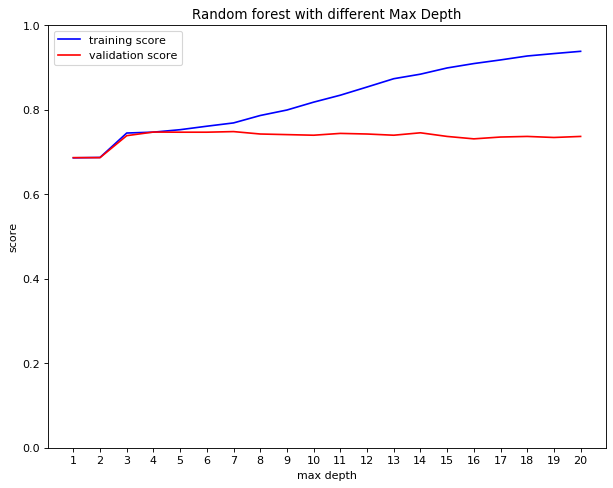

In [254]:
degree = np.arange(1, 21)
train_score, val_score = validation_curve(RandomForestClassifier(random_state=0, max_features = 0.5,
                                                                 max_samples = 0.5, criterion="entropy")
                                          , x_train_one_hot_scaled.drop(columns=['Customer ID'])
                                          , y_train_one_hot_scaled, param_name = 'max_depth', param_range = degree)

fig=plt.figure(figsize=(9,7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xticks(degree)
plt.title("Random forest with different Max Depth")
plt.xlabel('max depth')
plt.ylabel('score')

The diagram above shows the effect of different *max_depth* values on the accuracy of the random forest. Max depth indicates the maximum depth each decision tree classifier can reach. Just like in decision tree as is observable in the diagram after the depth of 4 or 5 accuracy of the training data stops increasing and only, accuracy of the training data increases therefore overfitting is happening after that depth.

Text(0, 0.5, 'score')

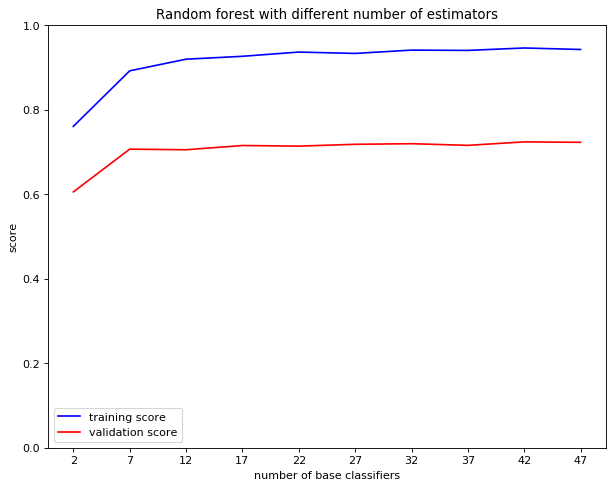

In [257]:
degree = np.arange(2, 51, 5)
train_score, val_score = validation_curve(RandomForestClassifier(random_state=0, criterion="entropy"
                                          , max_features = 0.5, max_samples = 0.5)
                                          , x_train_one_hot_scaled.drop(columns=['Customer ID'])
                                          , y_train_one_hot_scaled, param_name = 'n_estimators', param_range = degree)

fig=plt.figure(figsize=(9,7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xticks(degree)
plt.title("Random forest with different number of estimators")
plt.xlabel('number of base classifiers')
plt.ylabel('score')

The diagram above shows the effect of different *n_estimators* parameter values on the accuracy of the random forest. After increasing the number of the estimators over 7 the accuracy of the training set does not increase.

Text(0, 0.5, 'score')

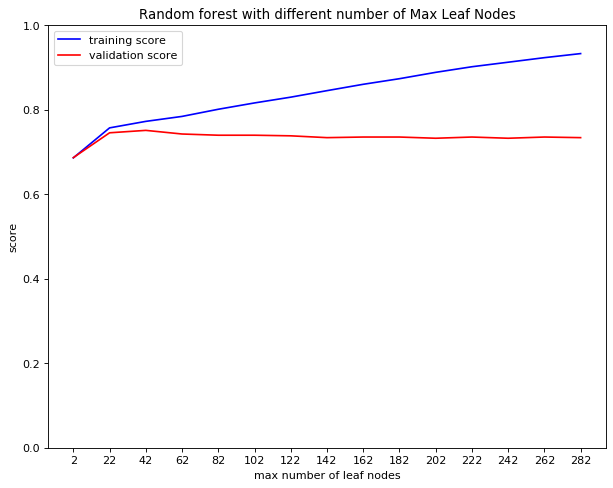

In [256]:
degree = np.arange(2, 300, 20)
train_score, val_score = validation_curve(RandomForestClassifier(random_state=0, criterion="entropy"
                                          , max_features = 0.5, max_samples = 0.5)
                                          , x_train_one_hot_scaled.drop(columns=['Customer ID'])
                                          , y_train_one_hot_scaled, param_name = 'max_leaf_nodes', param_range = degree)

fig=plt.figure(figsize=(9,7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xticks(degree)
plt.title("Random forest with different number of Max Leaf Nodes")
plt.xlabel('max number of leaf nodes')
plt.ylabel('score')

The diagram above shows the effect of different *max_leaf_node* values on the accuracy of the random forest. After the number of 42 there is no increase in the accuracy value and it even slightly decreases.

*** 

### Studying the effect of bagging on overfitting

An overfitted classifier such as a decision tree with a high max_depth for example 20 (which we know will overfit the model) is compared with bagging of that same classifier:

In [258]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=20)
dtc.fit(x_train_one_hot_scaled.drop(columns=['Customer ID']), y_train_one_hot_scaled)
dtc_prediction_test = dtc.predict(x_test_one_hot_scaled.drop(columns=['Customer ID']))
dtc_prediction_train = dtc.predict(x_train_one_hot_scaled.drop(columns=['Customer ID']))

print("train :\n",metrics.classification_report(y_train_one_hot_scaled, dtc_prediction_train))
print('------------------------------------------')
print("test :\n",metrics.classification_report(y_test_one_hot_scaled, dtc_prediction_test))


train :
               precision    recall  f1-score   support

          No       0.95      0.92      0.93      1097
         Yes       0.96      0.98      0.97      2395

    accuracy                           0.96      3492
   macro avg       0.96      0.95      0.95      3492
weighted avg       0.96      0.96      0.96      3492

------------------------------------------
test :
               precision    recall  f1-score   support

          No       0.48      0.52      0.50       283
         Yes       0.76      0.73      0.75       591

    accuracy                           0.66       874
   macro avg       0.62      0.63      0.62       874
weighted avg       0.67      0.66      0.67       874



In [259]:
bagging_classifier_dtc = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth= 20),
                         max_features = 0.5, max_samples = 0.5, n_estimators=250
                                      ).fit(x_train_one_hot_scaled.drop(columns=['Customer ID'])
                                                              , y_train_one_hot_scaled)
bagging_dtc_train = bagging_classifier_dtc.predict(x_train_one_hot_scaled.drop(columns=['Customer ID']))
bagging_dtc_test = bagging_classifier_dtc.predict(x_test_one_hot_scaled.drop(columns=['Customer ID']))
print("bagging decision tree train:\n",metrics.classification_report(y_train_one_hot_scaled, bagging_dtc_train))
print('------------------------------------------')
print("bagging decision tree test:\n",metrics.classification_report(y_test_one_hot_scaled, bagging_dtc_test))

bagging decision tree train:
               precision    recall  f1-score   support

          No       1.00      0.77      0.87      1097
         Yes       0.91      1.00      0.95      2395

    accuracy                           0.93      3492
   macro avg       0.95      0.89      0.91      3492
weighted avg       0.94      0.93      0.93      3492

------------------------------------------
bagging decision tree test:
               precision    recall  f1-score   support

          No       0.75      0.26      0.39       283
         Yes       0.73      0.96      0.83       591

    accuracy                           0.73       874
   macro avg       0.74      0.61      0.61       874
weighted avg       0.74      0.73      0.69       874



The performance metrics of the decision tree:
- Accuracy = 66%
- Precision = 67%
- Recall = 66%

The performance metrics of the bagged decision tree:
- Accuracy = 73%
- Precision = 74%
- Recall = 73%

It is quite observable that the bagged classifier works significantly better however on the training set it suffers from around 2 percent of loss in the metrics which is a fine tradeoff for much better values in the test set. The reason for that is that in bagging a lot of classifiers work with different subsets of the data to classify the data and then combines all their results in order to smooth out their predictions. This way the variance also decreases and overfitting is prevented.

***
### What is Bootstrapping and how does it effect the variance and bias?

In statistics, bootstrapping is any test or metric that relies on random sampling with replacement. In the sense of problem at hand it means using multiple classifiers of the same sort and handing them randomly sampled data with replacement and deciding the result based on the result of those classifiers. Just like what is done in randome forest.

Bootstrapping normally decreases the variance. The reason for that is when there are n estimators and therefor n results the final result if thought of as the mean of those n results has variance reduced by $\sqrt{n}$. This is just for clearifying purposes. Bootstrapping however may increase the bias. So the goal in bootstapping models is to choose a set of hyperparameters that makes the bias and variance tradeoff in a way that it minimizes the error.

***


### Hard voting

Voting is an ensemble method in which multiple classifiers are trained using diverse algorithms and then ensembled to predict the final output. In this project those calssifiers consist of phase 1 **KNN**, **Decision Tree** and **Logistic Regression**. For implementation *VotingClassifier* from sklearn.ensemble is used with the optimized classifiers of the previous phase.

In [138]:
voting_knn = KNeighborsClassifier(n_neighbors=9)
voting_dtc = DecisionTreeClassifier(max_depth=5)
voting_lrc = LogisticRegression()
voting_classifier = VotingClassifier(
                     estimators=[('KNN classifier', voting_knn), ('Desicion Tree classifier', voting_dtc),
                     ('Logistic Regression', voting_lrc)], voting='hard')
voting_classifier.fit(x_train_one_hot_scaled.drop(columns=['Customer ID']), y_train_one_hot_scaled)
voting_prediction_test = voting_classifier.predict(x_test_one_hot_scaled.drop(columns=['Customer ID']))
voting_prediction_train = voting_classifier.predict(x_train_one_hot_scaled.drop(columns=['Customer ID']))

print("voting train:\n",metrics.classification_report(y_train_one_hot_scaled, voting_prediction_train))
print('------------------------------------------')
print("voting test:\n",metrics.classification_report(y_test_one_hot_scaled, voting_prediction_test))

voting train:
               precision    recall  f1-score   support

           0       0.71      0.33      0.45      1097
           1       0.75      0.94      0.84      2395

    accuracy                           0.75      3492
   macro avg       0.73      0.63      0.64      3492
weighted avg       0.74      0.75      0.71      3492

------------------------------------------
voting test:
               precision    recall  f1-score   support

           0       0.73      0.33      0.46       283
           1       0.75      0.94      0.83       591

    accuracy                           0.74       874
   macro avg       0.74      0.64      0.65       874
weighted avg       0.74      0.74      0.71       874



Performance metrics:

Accuracy = 74%
Precision = 74%
Recall = 74%

The voting method has accptable performance mterics however some of the phase 1 classifiers worked better than the voting ensemble.

- KNN: Accuracy 72% Precision = 71% Recall = 72%
- Decision Tree: Accuracy = 75% Precision = 75% Recall = 75%
- Logistic Regression: Accuracy = 68% Precision = 67% Recall = 68%

Since the performance of the voting method is directly effected by the poor performance of the logistic classifier and the accptable performance of KNN classifier along with the good performance of the decision tree it is only logical that the performance of the voting may not be better than all three of the classifiers and the fact that voting does not have as good of a performance may be justifiable.